# BTC-USD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/BTC-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.5 MB/s eta 0:00:00


## 7:2:1

In [ ]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26619.278, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26629.632, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26623.493, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26624.529, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26628.773, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26617.325, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26617.260, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=26617.943, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26621.317, Time=1.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26619.345, Time=3.82 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=26616.407, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=26623.821, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=26615.749, Time=1.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=26620.448, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[35283.53990092 35347.4801134  35377.45958803 35398.53850683
 35411.76397235 35420.30366333 35425.77671612 35429.29114168
 35431.54674393 35432.99460426 35433.92394792 35434.52047445
 35434.90337166 35435.14914508 35435.30690168 35435.40816221
 35435.47315914 35435.51487926 35435.54165849 35435.5588475
 35435.56988075 35435.57696275 35435.58150853 35435.58442637
 35435.58629927 35435.58750144 35435.58827309 35435.58876839
 35435.58908632 35435.58929039]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 12656.098472885227
Validation RMSE: 13455.900771662618
Validation MAPE: 62.308776868773776
Testing MAE: 11399.754730068511
Testing RMSE: 13279.325489982994
Testing MAPE: 34.3941743524018


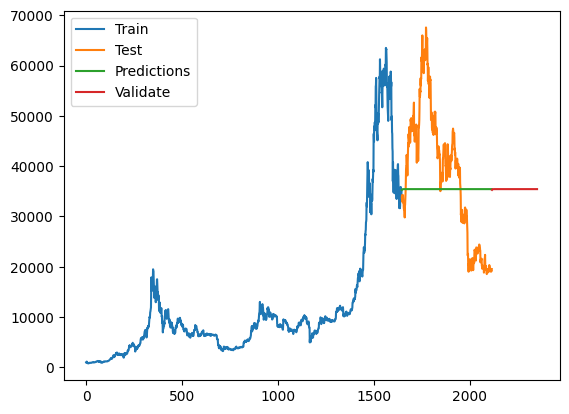

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(test_data.index, test_data['Close'])
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1646, stop=2116, step=1)

## 5:3:2

In [ ]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [ ]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17268.278, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17262.325, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17263.655, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17263.643, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17260.489, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17264.330, Time=1.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.005 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1))

# 5. Quá trình Validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 =  model.predict(n_periods=len(y_val1))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index1 =  df.index[-1]
last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next1_30_days = model.predict(n_periods=len(x_next1_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next1_30_days)

Predicted closing prices for the next 30 days:
[6185.06640625 6185.06640625 6185.06640625 6185.06640625 6185.06640625
 6185.06640625 6185.06640625 6185.06640625 6185.06640625 6185.06640625
 6185.06640625 6185.06640625 6185.06640625 6185.06640625 6185.06640625
 6185.06640625 6185.06640625 6185.06640625 6185.06640625 6185.06640625
 6185.06640625 6185.06640625 6185.06640625 6185.06640625 6185.06640625
 6185.06640625 6185.06640625 6185.06640625 6185.06640625 6185.06640625]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 19460.487223825636
Validation RMSE: 20968.391678764958
Validation MAPE: 73.90901720123047
Testing MAE: 26371.7191122285
Testing RMSE: 32362.812083953253
Testing MAPE: 68.20481234678631


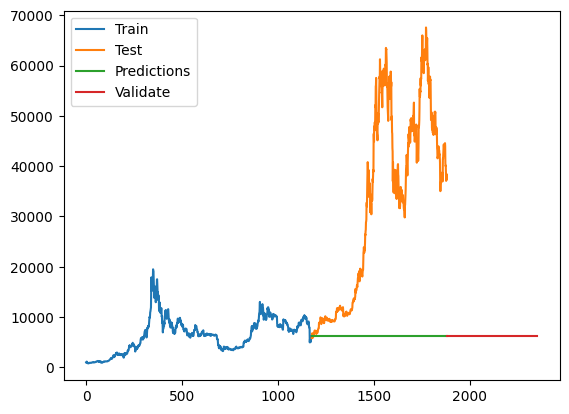

In [ ]:
# 9.Vẽ hình
plt.plot(train_data1.index, train_data1['Close'])
plt.plot(test_data1.index, test_data1['Close'])
plt.plot(test_data1.index, y_pred1)
plt.plot(val_data1.index, y_pred_val1)
# plt.plot(last_data1,y_next1_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()


# DOGE-USD

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.0 MB/s eta 0:00:00


## 7:2:1

In [ ]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8307.530, Time=3.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8279.768, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8300.783, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8296.926, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8281.512, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8330.444, Time=7.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8318.275, Time=2.78 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8301.657, Time=1.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8354.706, Time=8.29 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-8356.704, Time=5.45 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-8354.668, Time=2.62 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8362.085, Time=3.62 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8391.345, Time=6.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8385.451, Time=3.16 sec
 ARIMA(3,1,4)(0,0,0

ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.25565682 0.25923746 0.25524856 0.25431639 0.25493613 0.25246503
 0.25223863 0.25478864 0.25461984 0.25472606 0.25639303 0.25552079
 0.25418381 0.25466992 0.25410286 0.25335692 0.2544102  0.25485533
 0.25452653 0.25515505 0.2552422  0.25444764 0.25446639 0.25454055
 0.25408668 0.25432472 0.25476181 0.25460394 0.25470021 0.25492057]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 0.17392712940568175
Validation RMSE: 0.17415289118213992
Validation MAPE: 219.24179145265578
Testing MAE: 0.13083999672331206
Testing RMSE: 0.14343194663945574
Testing MAPE: 156.14972981121198


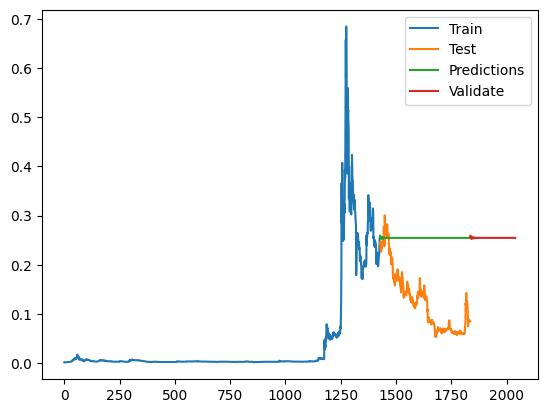

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
#plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

## 5:3:2

In [ ]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [ ]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13497.772, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13492.261, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13509.394, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13509.729, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13494.223, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13507.706, Time=0.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13507.038, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13510.698, Time=1.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13505.538, Time=3.91 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-13506.351, Time=7.39 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13486.110, Time=1.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13503.011, Time=6.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13512.424, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-13509.011, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13509.677, Time=1.65 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-13499.882, Time=1.52 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-13507.509, Time=3.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-13511.699, Time=0.82 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-13508.330, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13488.072, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-13504.995, Time=1.07 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 35.700 seconds


ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1))

# 5. Quá trình Validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 =  model.predict(n_periods=len(y_val1))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index1 =  df.index[-1]
last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next1_30_days = model.predict(n_periods=len(x_next1_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next1_30_days)

Predicted closing prices for the next 30 days:
[0.00342174 0.00342003 0.00342149 0.00342024 0.00342131 0.00342039
 0.00342118 0.00342051 0.00342108 0.00342059 0.00342101 0.00342065
 0.00342096 0.0034207  0.00342092 0.00342073 0.0034209  0.00342075
 0.00342088 0.00342077 0.00342086 0.00342078 0.00342085 0.00342079
 0.00342084 0.0034208  0.00342083 0.0034208  0.00342083 0.00342081]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 0.07456329295293711
Validation RMSE: 0.07616511265480354
Validation MAPE: 95.46437650621846
Testing MAE: 0.14680216625290787
Testing RMSE: 0.19347193803269924
Testing MAPE: 79.66814367691518


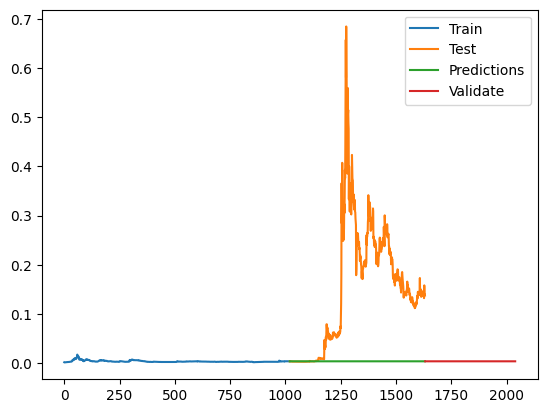

In [ ]:
# 9.Vẽ hình
plt.plot(train_data1.index, train_data1['Close'])
plt.plot(test_data1.index, test_data1['Close'])
plt.plot(test_data1.index, y_pred1)
plt.plot(val_data1.index, y_pred_val1)
#plt.plot(last_data1,y_next1_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()


# ETH-USD

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/ETH-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.7 MB/s eta 0:00:00


## 7:2:1

In [ ]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16130.938, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16153.011, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16138.838, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16140.988, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16152.558, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16129.822, Time=2.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16133.538, Time=1.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16127.976, Time=2.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16133.226, Time=3.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16134.019, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16127.720, Time=0.78 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16140.873, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16138.745, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=16132.684, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3587.95057745 3582.00296947 3586.79064302 3582.93668726 3586.03902388
 3583.5417216  3585.55198659 3583.93377427 3585.23639413 3584.18781818
 3585.03189522 3584.35243462 3584.89938317 3584.45910346 3584.81351746
 3584.52822318 3584.75787784 3584.57301166 3584.72182424 3584.60203389
 3584.69846209 3584.62083984 3584.68332378 3584.63302579 3584.6735144
 3584.6409221  3584.66715807 3584.64603878 3584.66303927 3584.6493543 ]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 1973.0590812341259
Validation RMSE: 1990.35035567023
Validation MAPE: 128.9883774240563
Testing MAE: 1303.1055702545934
Testing RMSE: 1522.8992681536165
Testing MAPE: 78.98122131884007


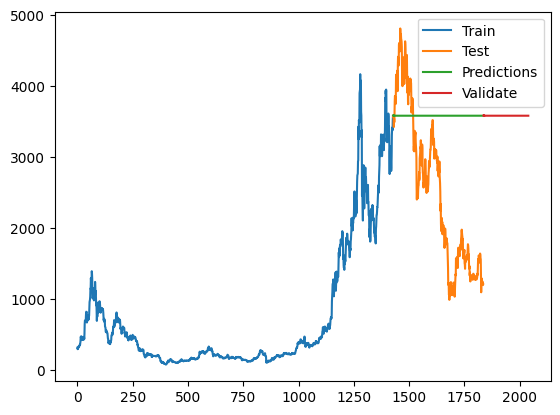

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

## 5:3:2

In [ ]:
# 2. Chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

In [ ]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9420.722, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9418.650, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9418.884, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9418.879, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9416.662, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9420.878, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.822 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1))

# 5. Quá trình Validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 =  model.predict(n_periods=len(y_val1))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index1 =  df.index[-1]
last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next1_30_days = np.array(range(last_index1+1, last_index1+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next1_30_days = model.predict(n_periods=len(x_next1_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next1_30_days)

Predicted closing prices for the next 30 days:
[408.14419556 408.14419556 408.14419556 408.14419556 408.14419556
 408.14419556 408.14419556 408.14419556 408.14419556 408.14419556
 408.14419556 408.14419556 408.14419556 408.14419556 408.14419556
 408.14419556 408.14419556 408.14419556 408.14419556 408.14419556
 408.14419556 408.14419556 408.14419556 408.14419556 408.14419556
 408.14419556 408.14419556 408.14419556 408.14419556 408.14419556]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 1185.0120692533606
Validation RMSE: 1230.4457941142668
Validation MAPE: 73.31969347598373
Testing MAE: 1928.3613168554368
Testing RMSE: 2295.8840787996173
Testing MAPE: 69.61696594696588


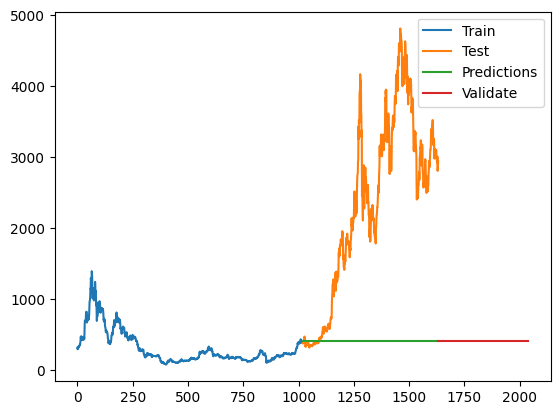

In [ ]:
# 9.Vẽ hình
plt.plot(train_data1.index, train_data1['Close'])
plt.plot(test_data1.index, test_data1['Close'])
plt.plot(test_data1.index, y_pred1)
plt.plot(val_data1.index, y_pred_val1)
# plt.plot(last_data1,y_next1_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()
